# Introductory Python for Astronomers

In this tutorial we will take a dataset consisting of measurements of galaxy distances and velocities. We will then use Hubble's law to measure the Hubble constant and approximate the age of the Universe. Along the way, we will load, fit, and plot data using python packages. *This tutorial was adpated from the dark energy python lesson designed by Adam Dempsey (Northwestern University)*

The first thing to do is to get our tools ready to go. In python, this means loading (or __importing__) the packages we need. If we use any kind of numerical manipulations, _numpy_ is essential. If we wish to visualize data _matplotlib_ is a popular library (_seaborn_ is also a valid option). For science and astonomy, _scipy_ and _astropy_ will be repeatedly used.

We sometimes want to import a package under a different (often much shorter) name and we use the __as__ command to give it a alias. In other cases, we may wish to import only a part of a package in which case we can use the __from__ command. Note that the native python commands, i.e. the ones which are built into python are color-coded in green.

In [7]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.units as u
# from astropy import units as u is equivalent here

## Hubble's Law

Hubble's law describes the relationship between the distance of a nearby galaxy and the velocity at which it is moving away from us. It can be summarized in the following equation:

$$v = H_0 d, $$

where $v$ is the velocity of a given galaxy, $d$ is its distance from us, and $H_0$ is known as the Hubble constant. The latter is often quoted in units of km/s/Mpc, and which as dimensions of inverse time. It turns out that (assuming an constant expansion rate throughout time), we can approximate the age of the Universe (denoted $t_0$) by taking its inverse and obtaining the Hubble time, $t_H$ given by

$$t_0 \approx t_H = \frac{1}{H_0}.$$

After importing the right packages, we fetch the dataset we will be using for our analysis. In this case, we will use the _loadtxt_ function which is great for .txt and .dat files. Note that _astropy_ is the library which allows users to load FITS files while the _csv_ package deals, as the name suggests, with .csv files.

In [8]:
# Load data from file

data = np.loadtxt('sn_data.dat.txt')

print(data.shape) # display the shape of the loaded array

# Store each column data separately
# to store row, use data[i] and to store column, use data[:,i]

redshifts = data[:,0]
distances = data[:,1]
errors = data[:,2]

(206, 3)


Right after loading data, it's often useful to make a quick plot to visualize the data we are dealing with and to identify any anomalies early. For this we will use the _plot_ function of _matplotlib_ which takes a minimum of 2 arguments for the x-axis data and y-axis data. Given the nature of our dataset, it's wiser to use the _scatter_ function to get an idea of the data (_plot_ is ideal for continuous functions as we'll see later).

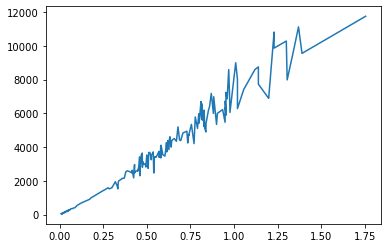

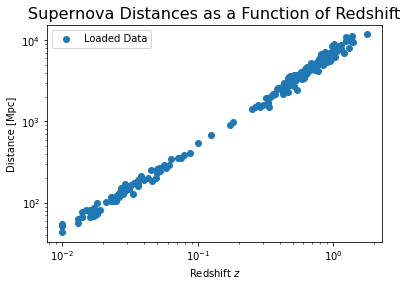

In [62]:
# Plot data

plt.plot(redshifts, distances)
plt.show()

plt.scatter(redshifts, distances, label='Loaded Data') # add data labels for legend
plt.title('Supernova Distances as a Function of Redshift', fontsize=16) # modify fontsize
plt.ylabel('Distance [Mpc]') # include units!
plt.xlabel('Redshift $z$') # use dollar signs to encapsulate "math" writing
plt.xscale('log') # change scale if desired
plt.yscale('log')
plt.legend(loc='best') # add legend, loc=best is to avoid having the legend hiding data points
#plt.savefig('redshift_distance_plot.pdf') # save figure to file to download and use in lab report
plt.show()

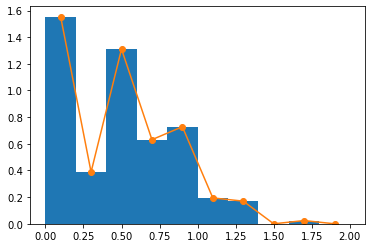

In [66]:
# Histogram of data

n_bins = 10
bin_edges = np.linspace(0, 2, n_bins+1) # linearly spaced bins with n_bin_edges = n_bins + 1

# the centers of each bins are halfway between the bin edges
# use a FOR LOOP to assign the correct values to the bin center array

bin_centers = np.empty(n_bins) # create an empty array
for i in range(0, n_bins):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1]) / 2


# plt hist allows user to choose their bin_edges and centers
# plt.hist also returns the number of elements per bins as its first (number 0) output

hist = plt.hist(redshifts, bins=bin_edges, density=True)[0] # density=True for normalized
plt.plot(bin_centers, hist, 'o-') # plot as a curve... useful if fitting a normal distribution to histogram

plt.show()

Next, we need to set-up a model for the linear fit of Hubble's law. The __def__ command is what we need to define a new function in python. In brackets, we specify the inputs of the function and the outputs are taken to be what follow __return__. Note that the code inside the function is indented. This makes it easier to keep track of which lines of code are part of the function and which are part of the rest of the code. Speaking of making the code easier to understand, we will add a _docstring_ to our function to remind ourselves what our function does. Pressing shift+tab simultaneously allows us to view the docstring at any time, but we first need to define the function.

In [12]:
# Define model

def Hubble(redshift_array, H0):
    '''
    Compute the recessional velocity of a galaxy given its
    distance from us and the value of the Hubble constant.
    Inputs: Array of galaxy distances, Hubble constant
    Outputs: Array of galaxy recessional velocities
    '''
    
    distance_array = 3e5 * redshift_array / H0
    
    return distance_array

Having defined our model, it is time to fit the data! We will use the _curve_fit_ function to get the best-fit values for the parameters as well as a covariance matrix which will help us determine the error margin on $H_0$.

In [44]:
# Subselect the low-redshift samples where the Hubble law is valid

z_max = 0.05 # maximum redshift considered
select = redshifts <= z_max # select the indexes of the data where the redshift is less than the max

selected_redshifts = redshifts[select] # keep only relevant points
selected_distances = distances[select]
selected_errors = errors[select]

print(distances.shape) # compare length of arrays before and after selection
print(selected_distances.shape)

(206,)
(50,)


In [45]:
# Fit linear relation to get Hubble parameter

fit = curve_fit(Hubble, selected_redshifts, selected_distances, sigma=selected_errors)
H0_estimate = round(fit[0][0], 2) # round to two decimal places
H0_error = round(np.sqrt(fit[1][0][0]), 2)

Having a value for the best fit parameters and a model, we can visualize the fit along with the data. To check our fit visually, it is useful to include error bars as part of the plot which is why we will use the _errorbar_ function for which we can specify the values of errors using the _yerr_ keyword argument.

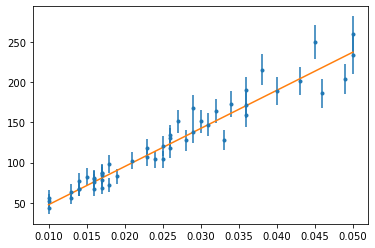

In [48]:
# Plot data with errorbars and fit

plt.errorbar(selected_redshifts, selected_distances, yerr=selected_errors, fmt='.')
plt.plot(selected_redshifts, Hubble(selected_redshifts, H0_estimate))

Combining the best-fit value and the covariance matrix obtained in the last step, we can quote the result with error bars and units (!!).

In [49]:
# Quote final estimate of Hubble parameter with appropriate error margin

print('H_0 = ' + str(H0_estimate) +   ' \pm ' + str(H0_error))

H_0 = 63.18 \pm 0.92


As seen previously, we can approximate the age of the Universe by taking the inverse of the Hubble constant, but the result will only make sense once we change to the appropriate units. For this we can use _astropy.units_ for a one-line conversion.

In [50]:
# Approximate age of the Universe with the Hubble time

H0_estimate_with_u = H0_estimate * u.km/u.s/u.Mpc # adding units to our H0 estimate
t_H = 1. / H0_estimate_with_u
print(t_H)
t_H_in_Gyr = t_H.to(u.Gyr)
print(t_H_in_Gyr)

0.015827793605571384 Mpc s / km
15.476293473896632 Gyr
